# Redes Neurais Artificiais

Redes neurais artificiais (RNAs) foram originalmente concebidas em meados do século XX como um modelo computacional do cérebro humano. Sua utilização foi pequena inicialmente devido ao limitado poder computacional disponível na época, além de algumas questões teóricas que somente foram resolvidas em meados da década de 1980. 

## Introdução

Duas décadas após o ressurgimento das RNAs com a criação do algoritmo de retropropagação de erro em 1986, aliado a um crescente numero dados rotulados e o aumento do poder de processamento em placas gráficas se tornou possivel treinar redes neurais profundas (com mais de três camadas) com técnicas que ficaram conhecidas como **Deep Learning**. Um dos exemplos mais famosos de Deep Learning é o artigo ["Gato do Youtube"](https://arxiv.org/abs/1112.6209), de Andrew Ng et al. Para outro exemplo mais recente aplicado em robótica veja esse [artigo](https://arxiv.org/abs/1805.03183) e esse [video](https://www.youtube.com/watch?v=B_UgAlsW99s&feature=youtu.be) de Avelino Forechi et al.

Esta aula aborda os fundamentos das RNAs, ou seja, redes de uma única camada. Mesmo simples abordaremos três aplicações: regressão linear, classificação entre duas classes usando o algoritmo perceptron e classificação multi-classe.

## Histórico

O primeiro marco na história das redes neurais artificiais ocorreu com a apresentação de um modelo de neurônio artificial por [McCulloch and Pitts, 1943](https://link.springer.com/article/10.1007/BF02478259). As atividades nessa linha de pesquisa culminaram na concepção do perceptron por [Rosenblatt, 1958](http://dx.doi.org/10.1037/h0042519) e em outro modelo semelhante, o adaline por [Widrow and Hoff, 1960](http://www-isl.stanford.edu/~widrow/papers/c1960adaptiveswitching.pdf). 

O perceptron é capaz de classificar entre classes que são linearmente separáveis. Foi usado para reconhecer por exemplo caracteres. Essa aplicação foi realizada em uma máquina chamada MARK I PERCEPTRON e causou uma grande euforia certamente exagerada em relação a imaginação das capacidades de futuros robôs inteligentes. 

A característica importante do perceptron foi a apresentação de um algoritmo de aprendizagem capaz de adaptar os pesos internos do neurônio de maneira que fosse capaz de resolver o problema de classificação linear, em caso da separabilidade linear das classes.

O caso exemplar das limitações do perceptron é o problema “Ou exclusivo” (XOR)
(f(0,0) = f(1,1) = 0, f(0,1) = f(1,0) = 1) que prova que uma função tão simples de classificação não pode ser calculada pelo perceptron. 

Essa crítica centrou-se no livro “Perceptrons” de [Minsky and Papert, 1969](https://mitpress.mit.edu/books/perceptrons). O impacto dessa crítica foi tão grande que a comunidade científica abandonou a área das redes neurais artificiais, com a exceção de alguns pesquisadores por exemplo Fukushima, Grossberg, Hopfield e Kohonen.

A solução para o problema XOR já era conhecida. Bastava acrescentar mais uma camada de neurônios na rede (uma camada escondida). O que faltava era um algoritmo que fosse capaz de treinar os pesos dessa rede multi-camada para que pudesse classificar corretamente problemas mais complexos. 

Várias soluções equivalentes foram descobertas durante os anos seguintes, más só a publicação do algoritmo de “retropropagação de erro” (error backpropagation) por [Rumelhart et al., 1986] popularizou uma solução de carácter universal para esse tipo de problema.


## Teoria

A terminologia da rede neural é inspirada nas operações biológicas de células chamadas neurônios. Um neurônio é uma célula que possui várias entradas que podem ser ativadas por algum processo externo. Dependendo da quantidade de ativação, o neurônio produz sua própria atividade e envia isto ao longo de suas saídas. Além disso, caminhos de entrada ou saída específicos podem ser "reforçados" ou ponderados mais que outros caminhos. 

A hipótese é que, como o cérebro humano é formado por uma rede de neurônios, podemos emular o cérebro modelando um neurônio e conectando-o por meio de um grafo de conexões com pesos (caminhos ponderados).

O equivalente artificial de uma célula neuronal é um nó (também chamado de neurônio artificial) que recebe um conjunto de entradas ponderadas, calcula a soma das entradas ponderadas para ser utilizada pela função de ativação $ \phi $, que repassa o resultado da função de ativação para os nós mais adiante no grafo. 

Graficamente, se parece com o seguinte:

<img src="img/node.png" width="50%" height="50%">

Observe que é mais simples representar a entrada para nossa função de ativação como um produto escalar:

$$ \phi \left(\sum_i w_i a_i\right) = \phi(\mathbf{w}^T\mathbf a) $$

Existem várias funções de ativação: 
- Podemos usar uma função de ativação linear ou identidade:
$$ \phi (\mathbf{w}^T \mathbf{a}) = \mathbf{w}^T \mathbf{a} $$

- Outro exemplo é a função de ativação sigmóide:
$$ \phi (\mathbf{w}^T\mathbf{a}) = \frac{1} {1+\exp(-\mathbf{w}^T \mathbf{a})} $$

- Mais um exemplo é a função de ativação tangente hiperbólica tanh:
$$ \phi (\mathbf{w}^T\mathbf{a}) = \mbox{tanh} (\mathbf{w}^T\mathbf{a}) $$

Podemos então formar uma rede neural juntando esses nós. Geralmente isso é feito em camadas - as saídas de uma camada de nós são conectadas às próximas entradas da camada.

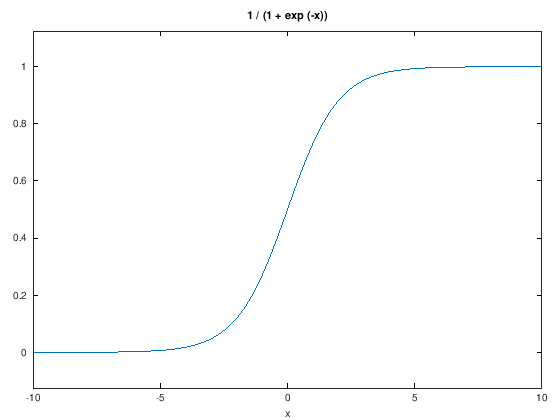

In [1]:
% plote a função sigmoide no intervalo [-10 10]
sigmoid = @(x) 1 ./ (1 + exp(-x));
ezplot(sigmoid, [-10 10])

% plote a tangente hiperbólica no intervalo [-10 10]

## Topologia

O potencial e flexibilidade do cálculo baseado em redes neurais vêm da criação de conjuntos de neurônios que estão interligados entre si. 

Esse paralelismo de elementos com processamento local cria a “inteligência” global da rede. Um elemento da rede recebe um estimulo nas suas entradas, processa esse sinal e emite um novo sinal de saída para fora que por sua vez é recebido pelos outros elementos.

Uma categorização fundamental da topologia dos neurônios pode ser feita em relação ao método de propagação da informação recebida, veja a figura abaixo. 

<img src="img/topologia.png" width="50%" height="50%">

Pode-se distinguir entre redes de propagação para frente (feedforward) e redes realimentadas (recurrent). 
- No caso das redes de propagação para frente o fluxo de informação é unidirecional. 
- No caso das redes realimentadas não há restrições para estabelecer ligações entre os neurônios. 

Neurônios que recebem a informação simultaneamente agrupam-se em camadas. Camadas que não estão ligadas às **entradas** e nem às **saídas** da rede chamam-se **camadas ocultas**.

## Paradigmas de Aprendizagem

Uma vez definida a rede neural, essa tem que ser treinada. Isso significa que os graus de liberdade que a rede dispõe, para solucionar a tarefa em consideração, têm que ser adaptados
de uma maneira ótima. 

Normalmente, isso significa que temos que modificar os pesos $w_{ij}$ entre o neurônio $i$ e o neurônio $j$, segundo um algoritmo. Um conjunto finito de n exemplos de treino está à nossa disposição para adaptar os pesos durante a fase de treinamento da rede.

Uma distinção principal em relação ao paradigma de aprendizagem que é válido para todo tipo de sistemas com capacidade de adaptação é aprendizagem **supervisionada** e aprendizagem **não-supervisionada**.

### Aprendizagem supervisionada

Nosso objetivo é treinar uma rede usando dados rotulados para que possamos fornecer um conjunto de entradas e produzir as saídas apropriadas para dados ainda não rotulados. 

Podemos fazer isso porque temos tanto a entrada $ \mathbf{x}_i $ quanto a saída de destino desejada $ y_i $ na forma de pares de dados. 

O treinamento, nesse caso, envolve o aprendizado dos pesos corretos associados a cada sinapse do neurônio para produzir a saída de destino, dada a entrada. 

A rede e seus pesos treinados formam uma função (denotada $ h $) que opera nos dados de entrada. 

Com a rede treinada, podemos fazer previsões considerando qualquer entrada de teste não rotulada.

<img src="img/training_testing.png" width="50%" height="50%">



Podemos treinar uma rede neural para realizar regressão ou classificação. Nesta parte, vou mostrar a regressão linear com uma rede de camada única. Redes de classificação e multicamadas serão cobertas posteriormente.

## Regressão linear

A regressão linear é a forma mais simples de regressão. Modelamos nosso sistema com uma combinação linear de sinapses para produzir uma saída. Isto é,

$$ y_i = h(\mathbf{x}_i,\mathbf{w}) = \mathbf{w}^T \mathbf{x}_i $$

Nossa tarefa é, então, encontrar os pesos que fornecem o melhor ajuste aos nossos dados de treinamento. Uma forma de medir nosso ajuste é calcular o erro (ou perda) de mínimos quadrados sobre nosso conjunto de dados:

$$ L(\mathbf{w}) = \sum_i(e_i)^2 = \sum_i\left(h(\mathbf{x}_i, \mathbf{w}) - y_i\right)^2$$

Para encontrar a linha de melhor ajuste, devemos minimizar $ L (\mathbf{w}) $. Que possui uma solução analitica fechada para mínimos quadrados, mas em geral podemos minimizar a perda usando gradiente descendente.

### Treino

Então, o que isso tem a ver com redes neurais? De fato, a rede neural mais simples que existe faz a regressão por mínimos quadrados. Considere a seguinte rede neural de camada única, com um único nó que usa uma função de ativação linear:

<img src="img/linear_1layer.png" width="50%" height="50%">

Essa rede toma como entrada um conjunto de dados com duas sinapses $ x_i^{(1)}, x_i^{(2)} $, pondera as sinapses com $ w_1, w_2 $ e as soma para ao final fazer uma predição. 

Poderíamos definir uma rede que coleta dados com mais sinapses, mas teríamos que monitorar mais pesos, por exemplo, $ w_1, \ldots, w_j $ com $ j $ sinapses.

Se usarmos a função de erro quadrático para medir o desempenho de nossa rede, ela seria idêntica ao erro definido para a regressão de mínimos quadrados acima:

$$ L (\mathbf{w}) = \sum_i \left(h(\mathbf{x}_i, \mathbf{w}) - y_i\right)^2$$

Este é o erro quadrático total das previsões da nossa rede sobre todo o nosso conjunto de treinamento em $i$.


Em seguida, usaremos método de otimização gradiente descendente sobre o gradiente do erro $ \nabla_ {\mathbf{w}} L(\mathbf{w}) $ para minimizar o erro geral nos dados de treinamento. 

Primeiro derivamos o gradiente do erro em relação a um peso específico $ w_{j \rightarrow k} $ (que é apenas o peso da sinapse que conecta o nó $ j $ ao nó $ k $ [note que tratamos as entradas como "nós" logo existe um peso $ w_{j \rightarrow k} $ para cada conexão da entrada (sinapse) para um nó da primeira camada]) no caso geral:

$$ \begin{align} \frac{\partial}{\partial w_{j \rightarrow k}} L(\mathbf{w}) =& \frac{\partial}{\partial w_{j \rightarrow k}} \sum_i \left(h(\mathbf{x}_i, \mathbf{w})-y_i\right)^2\\ =& \sum_i \frac{\partial}{\partial w_{j \rightarrow k}} \left(h(\mathbf{x}_i, \mathbf{w})-y_i\right)^2\\ =& \sum_i 2\left(h(\mathbf{x}_i, \mathbf{w})-y_i\right) \frac{\partial}{\partial w_{j \rightarrow k}} h(\mathbf{x}_i, \mathbf{w}) \end{align} $$

Neste ponto, devemos calcular o gradiente da função da rede neural em relação ao peso em questão ($ \frac{\partial}{\partial w_{j \rightarrow k}} h(\mathbf{x}_i, \mathbf{w}) $). No caso de uma rede de camada única, isso acaba sendo bem simples.

Lembre-se da rede mais simples de duas entradas acima. A função da rede é $ h(\mathbf{x}_i, \mathbf{w}) = w_1x_i^{(1)} + w_2x_i^{(2)} $. O gradiente em relação a $ w_1 $ é apenas $ x_1 $ e o gradiente em relação a $ w_2 $ é apenas $ x_2 $. 

Geralmente armazenamos todos os pesos da nossa rede em um vetor ou matriz, então o gradiente completo é:
$$ \nabla_{\mathbf{w}}L(\mathbf{w}) = \left(\frac{\partial L(\mathbf{w})}{\partial w_1}, \frac{\partial L(\mathbf{w})}{\partial w_2}\right) = \left(\sum_i 2x_i^{(1)}\mathbf{e}_i, \sum_i 2x_i^{(2)}\mathbf{e}_i\right) $$

Com isso, nós podemos atualizar os pesos da rede usando o método de descida gradiente padrão:

$$ \mathbf{w} = \mathbf{w} - \eta \nabla_{\mathbf{w}} L(\mathbf{w}) $$

Assim como em todos os métodos de gradiente descendente, deve-se ter cuidado ao selecionar o tamanho do passo "correto" $ \eta $, onde "correto" é dependente do problema. Depois de uma quantidade definida de épocas, os pesos que encontramos definem a reta com o melhor ajuste aos dados treinados.

### Teste

Com nossa rede treinada, o teste consiste em obter uma previsão para cada conjunto de teste $ x_i $ usando $ h (\mathbf{x}_i, \mathbf{w}) $. O erro de teste é calculado com a função de erro quadrático, exatamente como no treinamento:

$$ L(\mathbf{w}) = \sum_i \left( h(\mathbf{x}_i, \mathbf{w}) - y_i\right)^2 = \sum_i \left( \hat{y}_i - y_i\right)^2 $$

## Exemplo

Para essa implementação, usaremos o peso de um carro para prever seu desempenho em Milhas por Galão (MPG). Os dados são algo como estes exibidos no gráfico de dispersão:

<img src="img/mpg.png" width="75%" height="75%">

Observe que essa relação não parece ser linear - a regressão linear provavelmente não encontrará a relação subjacente entre peso e MPG. No entanto, ele encontrará uma linha que modela os dados "muito bem".

Como em nossas aulas, usarei o Octave e matplotlib (para plotagem). Para começar, vamos primeiro carregar os dados do MPG do mpg.csv:

In [2]:
% Carrega os dados e cria as matrizes de dados X e Y
% Isso cria um vetor de entrada X com uma coluna de uns (bias) e uma coluna de pesos de carros.
% O vetor alvo Y é uma coluna de valores MPG para cada carro.

X_file = csvread('mpg.csv');
N = size(X_file)(1)
X = [ones(N,1) X_file(:,5)];
Y = X_file(:,1);

N =  393


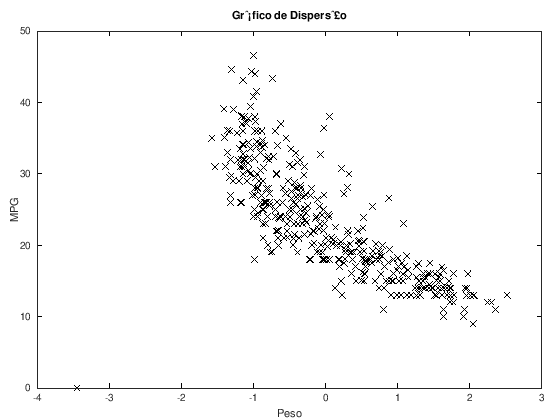

In [3]:
% Normaliza a entrada
X(:, 2) = (X(:, 2)-mean(X(:, 2)))/std(X(:, 2));

# Plota os dados
plot(X(:, 2), Y, 'kx')
xlabel('Peso')
ylabel('MPG')
title('Gráfico de Dispersão')



In [ ]:
% Há dois pesos, um para o bias e outro para a entrada
w = [0, 0];

% Inicie o batch de treinamento usando gradiente descendente, 
% ele será executado por max_iter épocas e terá uma taxa de aprendizado igual a eta
max_iter = 100
eta = 1E-3
for t = 1:max_iter
    %Precisamos fazer uma iteração sobre cada conjunto de dados de uma época
    grad_t = [0, 0];
    for i = 1:N
        x_i = X(i, :);
        y_i = Y(i);
        # Produto escalar, calcula h(x_i, w)
        h = dot(w, x_i);
        e = h - y_i;
        grad_t += 2*x_i*e;
    end
    # Atualiza os pesos
    w = w - eta*grad_t;
end
disp("Pesos encontrados:")
w

In [ ]:
# Plote os dados e a linha de melhor ajuste
tt = linspace(min(X(:, 2)), max(X(:, 2)), 10);
bf_line = w(1)+w(2)*tt;
plot(X(:, 2), Y, 'kx')
hold on
plot(tt, bf_line, 'r-')
xlabel('Peso')
ylabel('MPG')
title('Regressão com RNA')

## O que torna a rede neural artificial melhor que a regressão linear simples?

Uma rede neural artificial sem camadas ocultas é capaz de resolver problemas de regressão linear, mas assim que você começa a adicionar camadas adicionais, a rede adquire a capacidade de resolver problemas de regressão não linear. A regressão linear pode inclusive ser resolvida por um subconjunto de neurônios de uma rede com arquitetura profunda.

## Classificação Linear

Até então vimos apenas o uso de redes neurais para regressão linear. Mas e se quisermos fazer uma classificação usando uma rede de camada única? 

Veremos dois métodos: o algoritmo do perceptron e o uso de uma função de ativação sigmóide para gerar uma medida de verossimilhança. 

## Teoria

## Perceptron de Camada Única

Talvez a rede neural mais simples que podemos definir para classificação binária seja o perceptron de camada única. Dada uma entrada, o neurônio de saída é acionado (produz uma saída igual a 1) somente se o ponto de dados pertencer à classe de destino. Caso contrário, ele não dispara (produz uma saída igual a -1). A rede é algo assim:

<img src="img/sl_perceptron.png" width="50%" height="50%">

Em vez de usar uma função de ativação linear como na regressão linear, usamos uma função de sinal. Lembre-se da definição da função de sinal:

$$ \mbox{sign}(\mathbf{w}^T\mathbf{x}_i) = \begin{cases} 1 &\mbox{if }\mathbf{w}^T\mathbf{x}_i > 0 \\ 0 &\mbox{if }\mathbf{w}^T\mathbf{x}_i = 0 \\ -1 &\mbox{if }\mathbf{w}^T\mathbf{x}_i < 0 \end{cases} $$

Nesta, estamos calculando o produto escalar de uma amostra de dados com nosso vetor de pesos. Pontos com projeções positivas receberão um rótulo 1 e pontos com projeções negativas receberão um rótulo -1. 

In [ ]:
?sign

Consequentemente, nosso limite de decisão será perpendicular ao nosso vetor de peso. Por quê? Considere um problema de decisão bidimensional. O limite de decisão é a linha em que é igualmente provável que qualquer ponto nesta linha pertença a qualquer das classes, ou seja, $ h(\mathbf{x}_i, \mathbf{w}) = \mbox{sign}(\mathbf{w}^T\mathbf{x}_i) = 0 $, or $ \mathbf{w}^T\mathbf{x}_i = 0 $. Assim temos:

$$ \begin{align} \mathbf{w}^T\mathbf{x}_i =& 0\\ w_1+w_2x_i^{(2)} + w_3x_i^{(3)} =& 0\\ x_i^{(3)} =& -\frac{w_2}{w_3}x_i^{(2)} -\frac{w_1}{w_3} \end{align} $$

Neste caso, $ x_i^{(1)} $ é omitido pois o bias é sempre igual a 1, $ x_i ^ {(2)} $ é "$ x $" no plano cartesiano e $ x_i ^ {(3)} $ é "$ y $". 

A inclinação do nosso vetor de peso no plano cartesiano é $ \frac{w_3}{w_2} $ (o componente "$ y $" de $ \mathbf{w} $ é $ w_3 $ e o componente "$ x $" é $ w_2 $), enquanto a inclinação do limite de decisão é $ - \frac{w_2}{w_3} $ (tornando-os perpendiculares). 

Graficamente, temos:

<img src="img/linear_db.png" width="25%" height="25%">

O problema que enfrentamos agora é que a função de sinal não é continuamente diferenciável, e não podemos usar a descida de gradiente padrão para aprender os pesos. Portanto, usaremos o algoritmo perceptron propriamente dito. 

Esse algoritmo é um método iterativo usado para atualizar sucessivamente os pesos que definem um limite linear se e somente se esse limite não classificar um ponto de treinamento corretamente. O algoritmo é o seguinte:

Inicialize o vetor de pesos $ \mathbf{w} $ para todos com zeros.
Repita o seguinte:
1. Para cada exemplo de treinamento $ \mathbf{x}_i $:
    - Se $ h (\mathbf {x}_i, \mathbf {w}) \neq y_i $, então atualize os pesos com $ \mathbf {w} '= \mathbf {w} + \eta y_i \mathbf{x}_i $  (aqui, $ \eta $ é o tamanho do passo).
2. Se a condição de parada $ \frac {1} {N} \sum_{j = 0} ^ M | w_j '- w_j | <\delta $ é atingido, então aceite $ \mathbf {w} $ como o vetor de peso final ($ M $ nesse caso é o número de dimensões de entrada).

Se o nosso problema é linearmente separável, o algoritmo do perceptron é garantido para convergir. Portanto, ao termino do algoritmo, acabaremos com um limite de decisão linear definido por $ \mathbf {w} $.

Finalmente, se quisermos predizer o rótulo $ \hat {y}_i $ de um exemplo de teste $ \mathbf {x}_i $, usamos $ \hat {y}_i = \mbox {sign} (\mathbf {w } ^ T \mathbf {x}_i) $.

Para implementar essa teoria, treinaremos um conjunto de pesos que classificam dois grupos de dados 2D usando o algoritmo perceptron. Vamos começar definindo nossos dados 2D!

In [ ]:
# Generate two random clusters of 2D data
N_c = 100
A = 0.3*randn(N_c, 2)+[1, 1];
B = 0.3*randn(N_c, 2)+[3, 3];
X = [ones(2*N_c, 1), vertcat(A, B)];
Y = [-1*ones(N_c, 1), ones(N_c, 1)];
N = 2*N_c

Esse código gera dois agrupamentos 2D centralizados em torno dos pontos (1, 1) e (3, 3). Em seguida, acrescenta 1 a cada ponto, que é o nosso bias. Por fim, ele atribui o rótulo 1 a um agrupamento e o rótulo -1 ao outro agrupamento. Os exemplos são colocados na matriz $ X $ e os rótulos no vetor $ Y $.

Em seguida, executamos o algoritmo do perceptron para aprender os pesos:

In [ ]:
# Algoritmo perceptron
delta = 1E-7;
eta = 1E-2;
max_iter = 500;
w = [0, 0, 0];
w_old = [0, 0, 0];
for t = 1:max_iter
    for i = 1:N
        x_i = X(i, :);
        y_i = Y(i);
        h = sign(dot(w, x_i));
        if h ~= y_i
            w = w+eta*y_i*x_i;
        end
    end
    if (1/N)*abs(sum(w_old-w)) < delta
        fprintf ("Converged in %d steps.", t);
        break
    end
    w_old = w;

    if t==max_iter
        disp ("Warning, did not converge.");
    end
end
disp ("Weights found:");
w

Este trecho segue o algoritmo do perceptron diretamente. Na linha 5, inicializamos os pesos em 0. Na linha 6, também inicializamos um vetor que armazena os pesos anteriores, que usaremos para testar a condição de parada. 

Observe que executamos o algoritmo um numero maximo de iterações max_iter para que ele não seja executado indefinidamente se o problema não for separável.

Na linha 12, nós testamos para ver se $ h (\mathbf {x}_i) = y_i $, e se não atualizamos os pesos de acordo. 

Finalmente, testamos a condição de parada na linha 16.

Em um teste em particular, você pode ver que o algoritmo convergiu em 6 etapas:

<img src="img/two_class.gif" width="50%" height="50%">

E se, em vez de usar o perceptron, quiséssemos aprender uma sigmoide usando gradiente descendente? Podemos usar o mesmo procedimento para descida de gradiente, conforme detalhado na regressão linear. No entanto, fizemos inicialmente a descida de gradiente por uma quantidade definida de épocas.

Aqui nós introduzimos uma condição alternativa de parada. A heurística é a seguinte: se a norma do gradiente for pequena, devemos estar próximos do mínimo da função. Assim, se definirmos um limite para a norma do gradiente e ele ficar abaixo desse limite em uma etapa, paramos. 


## Classificação com uma função de ativação sigmóide (softmax)

Em vez de um classificador do tipo "tudo ou nada" (como a função de sinal), é útil encontrar alguma forma de medir a probabilidade de atribuição, ou seja, $ P( Y = y_i\ |\ X = \mathbf{x}_i, \mathbf{w} ) $. Se pudermos calcular essa probabilidade, podemos usar como uma medida de confiança de nossas previsões.

Em vez de usar uma função de ativação de sinal, podemos usar uma sigmóide (geralmente chamado softmax na literatura de rede neural) para gerar uma probabilidade:

$$ P(Y = y\ |\ X = \mathbf{x}_i, \mathbf{w}) = \frac{1}{1+\exp\left(-y\mathbf{w}^T\mathbf{x}_i\right)}$$

Mas como podemos atribuir um rótulo de uma classe quando dado apenas uma probabilidade? Podemos simplesmente "limitar" a probabilidade usando uma função de sinal, de modo que qualquer $ P(Y = 1\ |\ \mathbf{x}_i, \mathbf{w}) \geq 0.5$ receba um rótulo de classe 1, e qualquer probabilidade menor que 0,5 recebe um rótulo de classe -1. Nossa rede simples agora se parece com o seguinte:

<img src="img/linear_sigmoid.png" width="50%" height="50%">

Felizmente, essa função é idêntica à probabilidade usada pela regressão logística. Como a sigmoide é diferenciável, podemos usar gradiente padrão para treinar os pesos em vez do algoritmo do perceptron. Para uma derivação do gradiente para regressão logística, veja abaixo.

A probabilidade de nossos dados definidos por regressão logística é: $$ P(D_Y | D_X, \mathbf{w}) = \prod_i^N \frac{1}{1+\exp(-y_i\mathbf{w}^T\mathbf{x_i})} $$ 

Então a probabilidade do log é: $$ \ell(\mathbf{w}) = \log(P(D_Y | D_X, \mathbf{w})) = -\sum_i^N \log(1+\exp(-y_i\mathbf{w}^T\mathbf{x}_i) $$ 

Para a subida do gradiente, estamos tentando selecionar $ \mathbf{w} $ para maximizar a probabilidade do log. 

Para fazer isso, devemos primeiro calcular o gradiente: $$\begin{align} \nabla_{\mathbf{w}}\ell(\mathbf{w}) &= \frac{\partial}{\partial \mathbf{w}} \left(-\sum_i^N \log(1+\exp(-y_i\mathbf{w}^T\mathbf{x}_i))\right)\\ &= \sum_i^N \frac{y_i\mathbf{x}_i\exp(-y_i\mathbf{w}^T\mathbf{x_i})}{1+\exp(-y_i\mathbf{w}^T\mathbf{x}_i)} \end{align}$$ 

Porque $$ 1 - P(y_i | \mathbf{x}_i, \mathbf{w}) = \frac{\exp(-y_i\mathbf{w}^T\mathbf{x_i})}{1+\exp(-y_i\mathbf{w}^T\mathbf{x}_i)} $$ o gradiente é $$ \nabla_{\mathbf{w}}\ell(\mathbf{w}) = \sum_i^N y_i\mathbf{x}_i(1-P(y_i | \mathbf{x}_i, \mathbf{w})) $$ 

Para evitar ter que mudar a taxa de aprendizado para diferentes tamanhos de conjuntos de dados, podemos dividir a taxa pelo número de exemplos: $$ \nabla_{\mathbf{w}}\ell(\mathbf{w}) = \frac{1}{N}\sum_i^N y_i\mathbf{x}_i(1-P(y_i | \mathbf{x}_i, \mathbf{w})) $$

Para implementar essa teoria, estaremos aprendendo um conjunto de pesos que classificam dois grupos de dados 2D usando o gradiente descendente.

In [ ]:
# Run gradient descent
delta = 1E-7;
eta = 1E-3;
max_iter = 1000;
w = [0, 0, 0]
grad_thresh = 5;
for t = 1:max_iter
    grad_t = [0., 0., 0.];
    for i = 1:N
        x_i = X(i, :);
        y_i = Y(i);

        grad_t += y_i*x_i*(exp(-y_i*dot(w, x_i)))/(1+exp(-y_i*dot(w, x_i)));
    end
    w = w + (1/N)*eta*grad_t;
    grad_norm = norm(grad_t,2);
    if grad_norm < grad_thresh
        fprintf( "Converged in %d steps.", t);
        break
    end
end
disp ("Weights found:")
w

Na linha 13, calculamos o gradiente de acordo com a derivação da sigmoide. Nas linhas 16-17, verificamos se chegamos à condição de parada. Esta é uma heurística simples que pode não funcionar em todos os casos, mas funciona bem o suficiente para um problema simples como este.